In [1]:
from data.dataset import load_dataset
from helpers.data_research import data_research
from helpers.correlataion import find_correlated_columns
from data.create_dataset import create_dataset

from sklearn import preprocessing

from models.RF_Model import create_RF_model

In [2]:
dataset = load_dataset()
print(dataset)

                      mdct        date    yr  mo  da  hr  prcp     stp  \
0      2006-10-31 00:00:00  2006-10-31  2006  10  31   0   0.0     0.0   
1      2006-10-31 01:00:00  2006-10-31  2006  10  31   1   0.0     0.0   
2      2006-10-31 02:00:00  2006-10-31  2006  10  31   2   0.0     0.0   
3      2006-10-31 03:00:00  2006-10-31  2006  10  31   3   0.0     0.0   
4      2006-10-31 04:00:00  2006-10-31  2006  10  31   4   0.0     0.0   
...                    ...         ...   ...  ..  ..  ..   ...     ...   
86947  2016-09-30 19:00:00  2016-09-30  2016   9  30  19   0.0  1015.3   
86948  2016-09-30 20:00:00  2016-09-30  2016   9  30  20   0.0  1015.7   
86949  2016-09-30 21:00:00  2016-09-30  2016   9  30  21   0.0  1016.0   
86950  2016-09-30 22:00:00  2016-09-30  2016   9  30  22   0.0  1016.5   
86951  2016-09-30 23:00:00  2016-09-30  2016   9  30  23   0.0  1017.8   

          gbrd  temp  dewp  hmdy  wdsp   wdct  gust  
0        0.000   0.0   0.0   0.0   0.0    0.0   0.0  
1  

YEAR: 2016
MEAN: 0.09476885644768868
MINIMAL: 0.0
MAXIMUM: 20.8
STANDARD DEVIATION: 0.7554093945725827


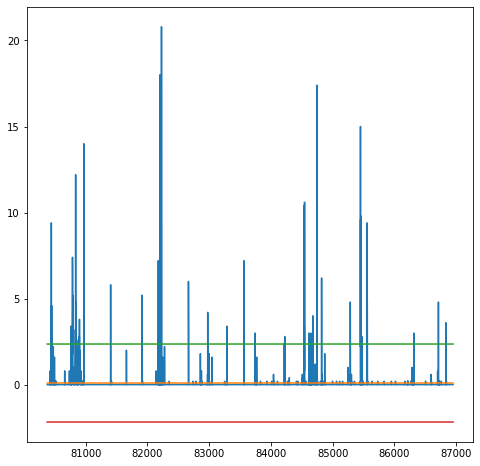

YEAR: 2006
MEAN: 0.35981182795698924
MINIMAL: 0.0
MAXIMUM: 36.4
STANDARD DEVIATION: 1.6543632568706828


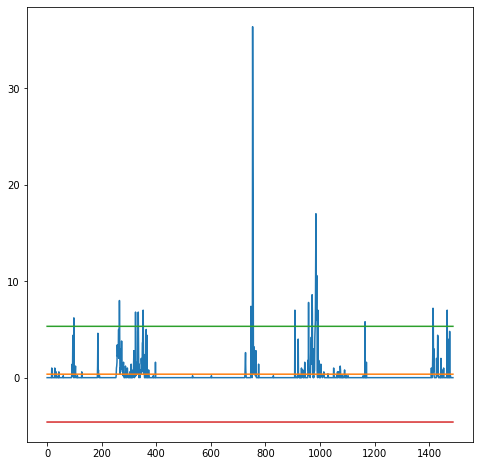

YEAR: 2007
MEAN: 0.09235159817351622
MINIMAL: 0.0
MAXIMUM: 21.4
STANDARD DEVIATION: 0.7036745299988514


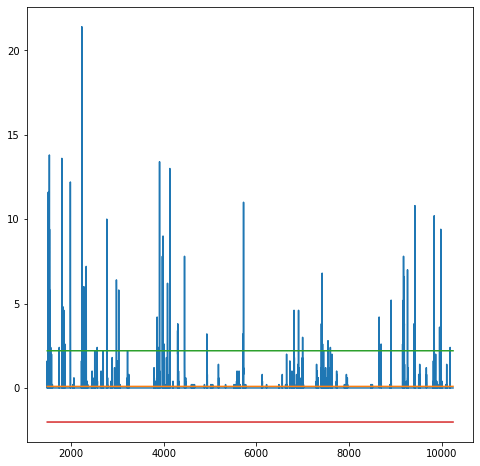

YEAR: 2008
MEAN: 0.17169854280510055
MINIMAL: 0.0
MAXIMUM: 70.2
STANDARD DEVIATION: 1.264250400075449


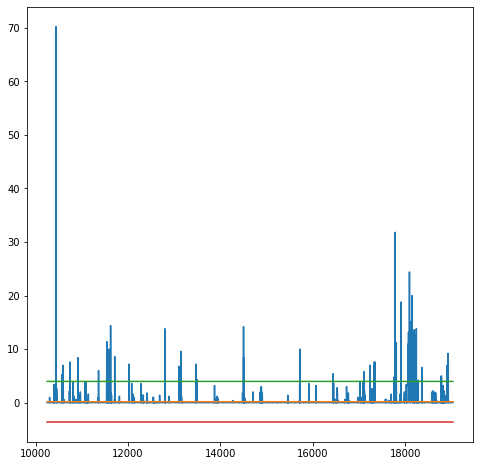

YEAR: 2009
MEAN: 0.21746575342465843
MINIMAL: 0.0
MAXIMUM: 45.6
STANDARD DEVIATION: 1.46927460543065


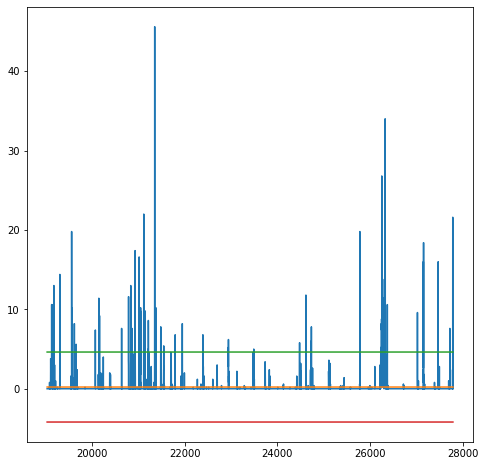

YEAR: 2010
MEAN: 0.16321917808219263
MINIMAL: 0.0
MAXIMUM: 47.4
STANDARD DEVIATION: 1.368523438352925


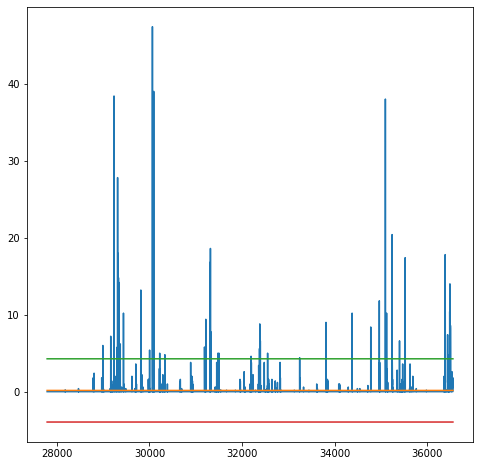

YEAR: 2011
MEAN: 0.19771689497716996
MINIMAL: 0.0
MAXIMUM: 38.2
STANDARD DEVIATION: 1.2793937270941627


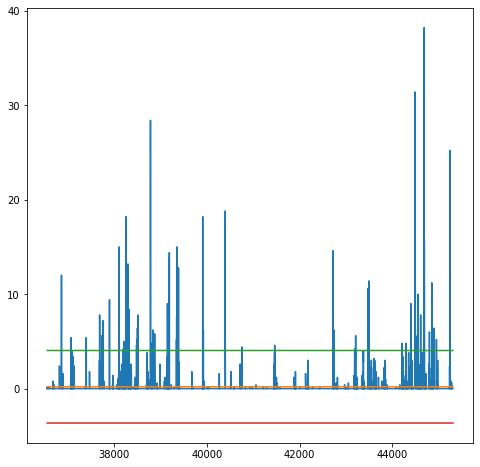

YEAR: 2012
MEAN: 0.211976320582879
MINIMAL: 0.0
MAXIMUM: 52.2
STANDARD DEVIATION: 1.6030860911046554


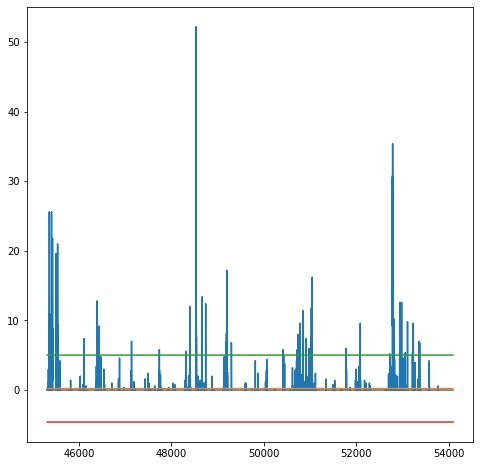

YEAR: 2013
MEAN: 0.2519406392694069
MINIMAL: 0.0
MAXIMUM: 42.2
STANDARD DEVIATION: 1.5852847912979007


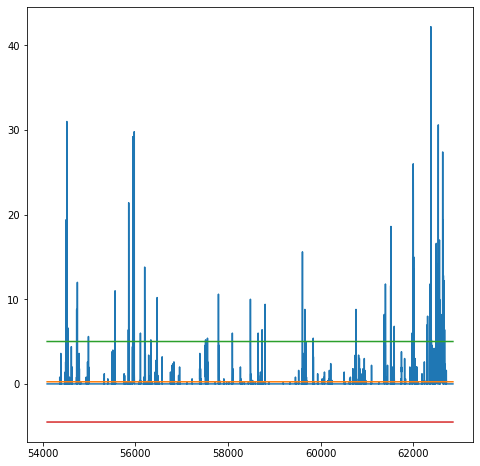

YEAR: 2014
MEAN: 0.1266894977168951
MINIMAL: 0.0
MAXIMUM: 47.8
STANDARD DEVIATION: 1.2366662976912006


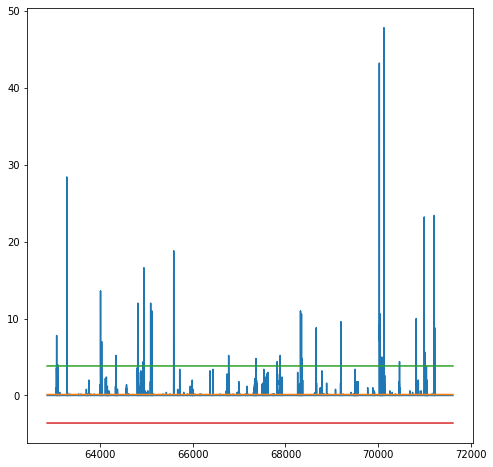

YEAR: 2015
MEAN: 0.08947488584474908
MINIMAL: 0.0
MAXIMUM: 29.2
STANDARD DEVIATION: 0.7615660360845463


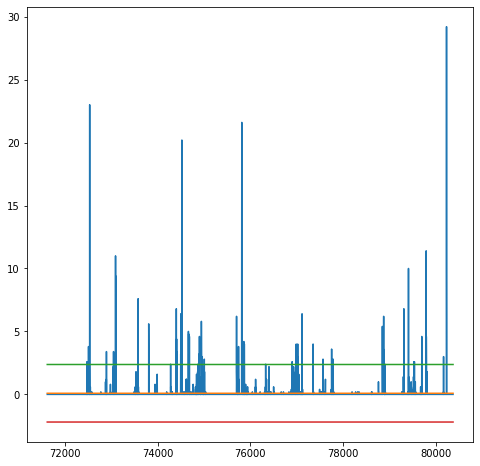

In [3]:
data_research(dataset, 'prcp')

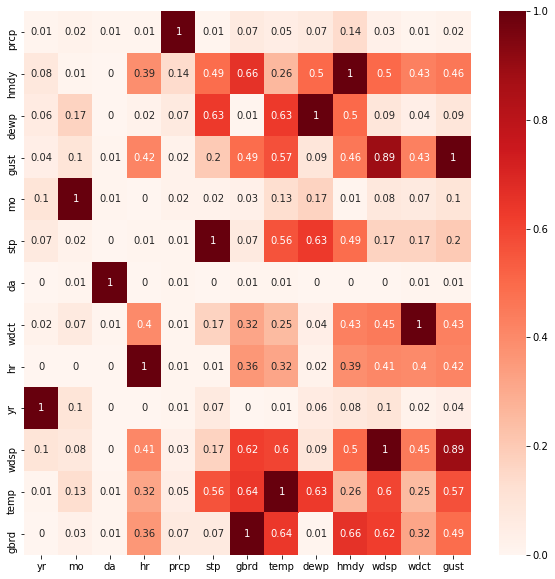

prcp    1.000000
hmdy    0.138798
Name: prcp, dtype: float64


['hmdy']

In [4]:
find_correlated_columns(dataset, 'prcp')

In [5]:
#X_prcp_RF = create_dataset(df_filtered, ['hmdy', 'gust'])
X_prcp_RF = dataset.loc[:, ~dataset.columns.isin(['prcp', 'mdct', 'date'])]
X_prcp_RF = preprocessing.normalize(X_prcp_RF)

In [7]:
# data response
y_prcp = create_dataset(dataset, ['prcp'])
display(y_prcp)

,prcp
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
86947,0.0
86948,0.0
86949,0.0
86950,0.0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
building tree 1 of 100
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
building tree 2 of 100
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100


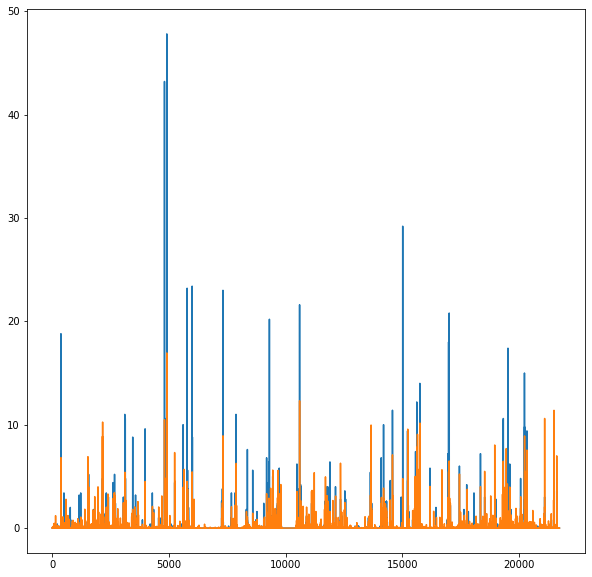

In [8]:
model = create_RF_model(X_prcp_RF, y_prcp)